# Business understanding

The data utilized for this process is about sales of houses in King County US. The data contains many aspects of the sold houses including prices, features, local, dates and more.

This notebook will be used to describe the procedures and reasoning for developing the analysis and answering the following questions:

    1 - Where is the region of the county that most sales of houses are done? What is the medium price of the houses of this region?
    2 - Comparing popular x unpopular region statistics
    3 - Where is the region of the most expensive houses?
    4 - Summing up everything we learned so far about the data and then testing our guesses

# Data understanding

As a start, we need to take a look at the data first

In [142]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [143]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [144]:
df.shape

(21613, 21)

The data seems to be fine, no strange values, no apparent Nan values, column meanings are well described by their names
We should see how our data is behaving statistically

In [145]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data preparation

The columns sqft_basement, floors and yr_renovated don't seem to be very descriptive by themselves...

Let's fix it by adding some more columns to the data!

In [146]:
df['has_basement'] = (df['sqft_basement'] != 0)*1
df['more_than_1_floor'] = (df['floors'] > 1)*1
df['has_been_renovated'] = (df['yr_renovated'] !=0)*1
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement',
       'more_than_1_floor', 'has_been_renovated'],
      dtype='object')

In [147]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,more_than_1_floor,has_been_renovated
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.392680,0.505853,0.042289
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.488358,0.499977,0.201253
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,1.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,1.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000


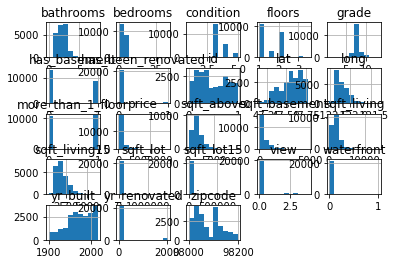

In [148]:
df.hist();

Everything seems fine so far, all columns have the same count number, suggesting there is no Nan values. So the data we got is already pretty clean and ready to start working with

In [149]:
df.isna().sum().sum() #checking for Nan values

0

# Data modeling

Let's start with the questions now

### 1 - Where is the region of the county that most sales of houses are done? What is the medium price of the houses of this region?

In [150]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,more_than_1_floor,has_been_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0


It seems we are going to plot a lot of histograms, so let's make a function to easily make our plots:

In [151]:
def hist(data, column, bins = None, title=None, xlabel=None, ylabel=None, savefig=False, savefig_name=None):
    """
    Description: a function that easily plots a histogram with the possibility of describing it using
    titles, labels for the axis and even saving the image
    
    Arguments:
        data: a pandas dataframe that should be used for the histogram
        columns: a string giving the name of the column that should be used for ploting
        bins: a list of numbers containing the size of the bins used in this plot
        title: a string containing the title of the histogram
        xlabel: a string containing a description of the x axis
        ylabel: a string containing a description of the y axis
        savefig:a boolean to verify if the image is supposed to be saved or not
        savefig_name: a string containing the name of the saved image if this option is choosed
    
    Returns:
        None
    
    """
    
    
    plt.hist(data[column], bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if savefig:
        plt.savefig(savefig_name)

We can see there is a cloumn giving us the latitude and longitude of the houses, let's plot an histogram to take a look at latitude first:

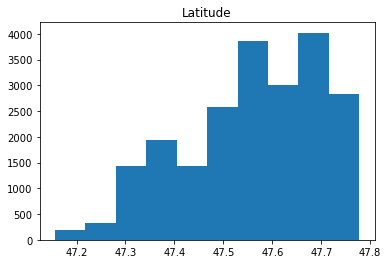

In [152]:
hist(df, 'lat', title='Latitude', savefig=True, savefig_name='latitude1.png')

Humm... the bins are too big and it may be hindering something about the data, let's make the bins smaller and see what happens to the histogram

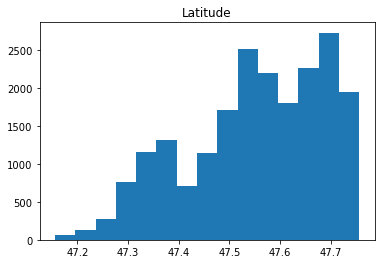

In [153]:
bins = np.arange(df['lat'].min(), df['lat'].max(), 0.04)
hist(df, 'lat', title='Latitude', bins=bins, savefig=True, savefig_name='latitude2.png')

Humm.. let's make it even smaller...

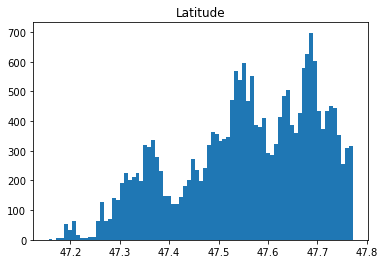

In [154]:
bins = np.arange(df['lat'].min(), df['lat'].max(), 0.008)
hist(df, 'lat', title='Latitude', bins=bins, savefig=True, savefig_name='latitude3.png')

Now we see an interesting aspect of our data. It seems there are at least 3 different ranges where the data has an appearence similar to a normal distribution where the bigger two overlap, namely of ranges of:

        1 -> 47.25 ~ 47.41
        
        2 -> 47.41 ~ 47.61
        
        3 -> 47.61 ~ 47.77
        
The right side of the skew of the 3rd range seems to have been cut off, that is probably due to it being in the border of the studied county and it seems it may be very close to another city since there is a slight rise by the end of the histogram.

Now, let's take a look at the longitude

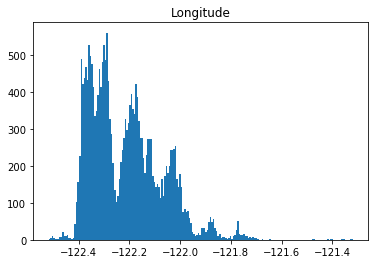

In [155]:
bins = np.arange(df['long'].min(), df['long'].max(), 0.006)
hist(df, 'long', title='Longitude', bins=bins, savefig=True, savefig_name='longitude3.png')

Similarly to the pattern we see in the Latitude data, we can see 3 main regions where the selling of houses is concentrated.

Main ranges:


        1 -> -122.43 ~ -122.23
        
        2 -> -122.23 ~ -122.08
        
        3 -> -122.08 ~ -121.95
        
But since the peek is higher in the latitude histogram (around 700 in latitude in contrast with the 550 of longitude), it seems the sales are more distributed longitudinally than latitudinally. Is it true? Well, it may be due to the fact that our bin size was arbitrarly chosen, let's make it even then:

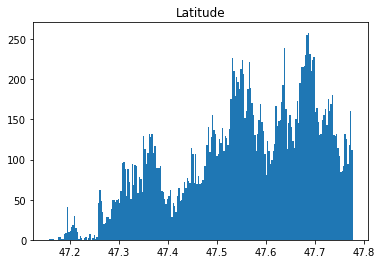

In [156]:
bins = np.arange(df['lat'].min(), df['lat'].max(), (df['lat'].max() - df['lat'].min())*100/df.shape[0]  )
hist(df, 'lat', title='Latitude', bins=bins, savefig=True, savefig_name='latitude4.png')

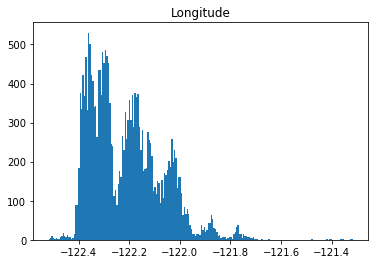

In [157]:
bins = np.arange(df['long'].min(), df['long'].max(), (df['long'].max() - df['long'].min())*100/df.shape[0]  )
hist(df, 'long', title='Longitude', bins=bins, savefig=True, savefig_name='longitude4.png')

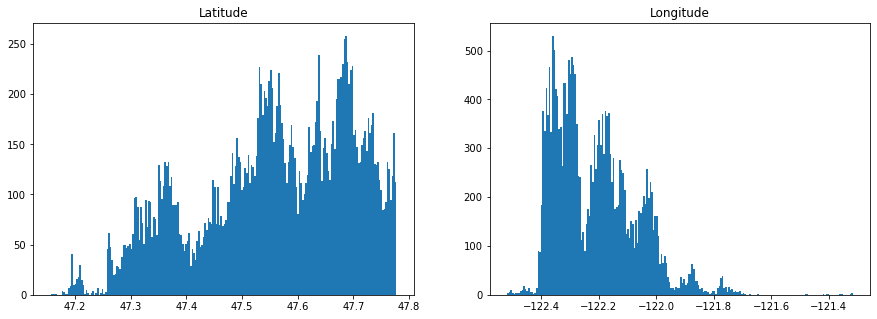

In [158]:
plt.figure(figsize = [15, 5]);
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1

bins = np.arange(df['lat'].min(), df['lat'].max(), (df['lat'].max() - df['lat'].min())*100/df.shape[0]  )
hist(df, 'lat', bins=bins, title='Latitude')

plt.subplot(1, 2, 2)

bins = np.arange(df['long'].min(), df['long'].max(), (df['long'].max() - df['long'].min())*100/df.shape[0]  )
hist(df, 'long', bins=bins, title='Longitude', savefig=True, savefig_name='LatLong1.png')

The bin size was made to be around 100 houses for both histograms. Now, we can clearly see that the opposite was true, the sales are more distributed latitudinally rather than longitudinally, which can say a lot about the positions of the main cities in the county. For instance, the main cities seem to be around the north and west of King County, more specifically, between latitudes of 47.61 ~ 47.77 and longitudes of -122.43 ~ -122.23.

To answer the mean price of this region, we just need to filter the data corresponding to this specific region.

In [198]:
df_pop = df.query("lat > 47.61 and lat < 47.77 and long > -122.43 and long < -122.23")
#This is the dataset that contains only the houses of the popular region

In [199]:
df_pop.shape[0]/df.shape[0] #the proportion of the houses that are part of the popular region in respect to all the dataset

0.23758848840975338

In [200]:
df_pop.price.mean(), df.price.mean() #how the popular region mean price relates to the overall mean price

(640551.6079844206, 540088.1417665294)

As expected, the mean price of the most popular region is bigger than the mean price of all the county

In [201]:
df_pop.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement',
       'more_than_1_floor', 'has_been_renovated'],
      dtype='object')

### 2 - Comparing popular x unpopular region statistics

In [202]:
df_unpop = df.query("lat < 47.61 and  long > -122.23")
#This dataset contains most of the houses that are not part of the popular region

In [203]:
df_pop.shape, df_unpop.shape

((5135, 24), (7056, 24))

We should now compare the statistics of both dataframes and try to find out any interesting behavior. The method 'describe' will be very helpful here!

In [204]:
df_pop.describe().loc['mean']

id                    4.590032e+09
price                 6.405516e+05
bedrooms              3.208569e+00
bathrooms             1.979796e+00
sqft_living           1.887397e+03
sqft_lot              6.183010e+03
floors                1.542941e+00
waterfront            4.868549e-03
view                  2.556962e-01
condition             3.478870e+00
grade                 7.562610e+00
sqft_above            1.526493e+03
sqft_basement         3.609046e+02
yr_built              1.954739e+03
yr_renovated          1.267544e+02
zipcode               9.811995e+04
lat                   4.768770e+01
long                 -1.223304e+02
sqft_living15         1.763895e+03
sqft_lot15            5.963177e+03
has_basement          5.298929e-01
more_than_1_floor     5.246349e-01
has_been_renovated    6.348588e-02
Name: mean, dtype: float64

In [205]:
df_unpop.describe().loc['mean']

id                    4.561873e+09
price                 5.060217e+05
bedrooms              3.534722e+00
bathrooms             2.292056e+00
sqft_living           2.280789e+03
sqft_lot              2.165944e+04
floors                1.556122e+00
waterfront            5.668934e-03
view                  1.937358e-01
condition             3.418509e+00
grade                 7.840561e+00
sqft_above            2.050809e+03
sqft_basement         2.299800e+02
yr_built              1.983784e+03
yr_renovated          5.517602e+01
zipcode               9.804197e+04
lat                   4.745985e+01
long                 -1.220929e+02
sqft_living15         2.200838e+03
sqft_lot15            1.719199e+04
has_basement          2.711168e-01
more_than_1_floor     5.687358e-01
has_been_renovated    2.763605e-02
Name: mean, dtype: float64

We should check how exactly they relate to each other:

In [206]:
df_unpop.describe().loc['mean']/df_pop.describe().loc['mean']

id                    0.993865
price                 0.789978
bedrooms              1.101651
bathrooms             1.157724
sqft_living           1.208431
sqft_lot              3.503057
floors                1.008543
waterfront            1.164399
view                  0.757680
condition             0.982649
grade                 1.036753
sqft_above            1.343477
sqft_basement         0.637232
yr_built              1.014859
yr_renovated          0.435299
zipcode               0.999205
lat                   0.995222
long                  0.998059
sqft_living15         1.247715
sqft_lot15            2.883026
has_basement          0.511644
more_than_1_floor     1.084060
has_been_renovated    0.435310
Name: mean, dtype: float64

In [207]:
1/0.7899 # price

1.2659830358273199

In [208]:
1/0.637 # sqft_basement

1.5698587127158556

In [209]:
1/0.435 # has_been_renovated

2.2988505747126435

So, the popular region houses have a mean price 26% higher, a basement area 56% higher and seem to have been renovated 129% more the houses of the unpopular region whereas unpopular region houses' lots are 3.5 times bigger and have 34% more area in above floors

### 3 - Where are the most expensive houses located?

In [210]:
df4 = df.loc[:, ['price', 'lat', 'long', 'bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'yr_built']]
# factors that may directly relate to house prices

Let's take a look at the heatmap

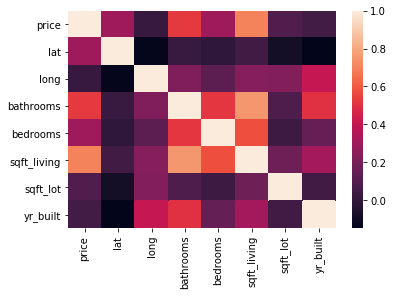

In [211]:
sns.heatmap(df4.corr());

Hmmm... there doesn't seem to be any relevant relationship. Let's take a look at a scatter plot of the latitude x price and longitude x price

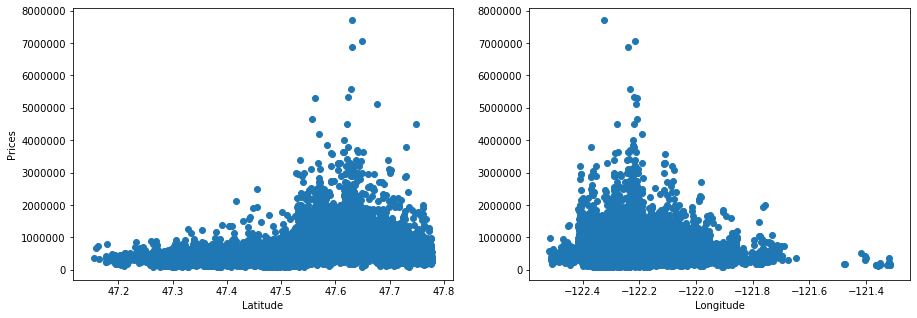

In [212]:
plt.figure(figsize = [15, 5]);
plt.subplot(1, 2, 1)
plt.scatter(df.lat, df.price);
plt.xlabel('Latitude')
plt.ylabel('Prices')
plt.subplot(1, 2, 2)
plt.scatter(df.long, df.price);
plt.xlabel('Longitude');
plt.savefig('price2.jpg')

In [213]:
df.iloc[df.price.idxmax()]['lat'] # latitude of the most expensive house

47.6298

In [182]:
np.sort(df.price)[::-1][1] #price of the second most expensive

7062500.0

In [184]:
df.query('price == 7062500.0')['long'] #longitude of the second most expensive house

3914   -122.214
Name: long, dtype: float64

Most expensive houses are located in the latitude of the most expensive house, which is latitude 47.6298. As for the longitude, the most expensive house seems a little off from the place where most expensive houses are located, te longitude of the second most expensive house is given by longitude -122.214.

Now let's take another approach, let's use statistics.

In [186]:
df.shape

(21613, 24)

In [187]:
np.sort(df.price)[::-1][1000]

1200000.0

In [191]:
df_expensive = df.query('price >= 1200000.0')

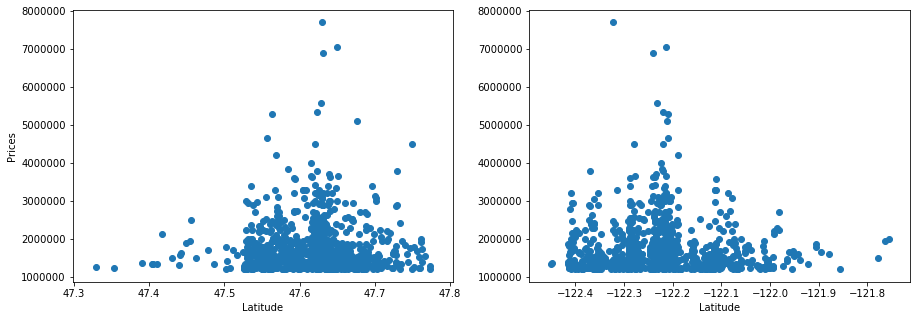

In [192]:
plt.figure(figsize = [15, 5]);
plt.subplot(1, 2, 1)
plt.scatter(df_expensive.lat, df_expensive.price);
plt.xlabel('Latitude')
plt.ylabel('Prices')
plt.subplot(1, 2, 2)
plt.scatter(df_expensive.long, df_expensive.price);
plt.xlabel('Latitude')
plt.savefig('price3')

In [214]:
df_expensive.lat.mean(), df_expensive.long.mean()

(47.617090268123185, -122.2298758689177)

It seems our first guess was about right, our first estimation by peeking at the scatterplot misses the mean of the 1000 more expensive houses by a small margin:
    
    1st estimation:
        latitude: 47.629
        longitude: -122.214
    
    2nd:estimation:
        latitude: 47.617
        longitude: -122.229

Let's take a look at the histogram of the prices

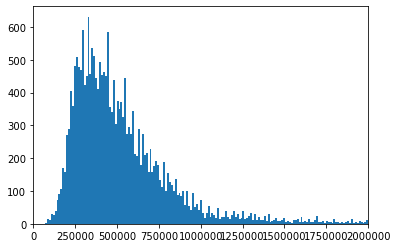

In [215]:
bins = np.arange(0, 2500000, 2500000*100/df.shape[0]  )
plt.hist(df.price, bins=bins);
plt.xlim(0, 2000000);

### 4 - Summing it all up

We can synthetize most of the information we gathered by merging our findings on the positions of the houses and their price by ploting everythin in a scatterplot with color as the 3rd variable

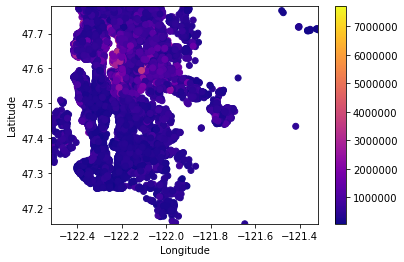

In [47]:
plt.scatter(df.long,df.lat,c=df.price,cmap='plasma')
plt.colorbar();
plt.xlim(df.long.min(), df.long.max());
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(df.lat.min(), df.lat.max());
plt.savefig('heatmap')

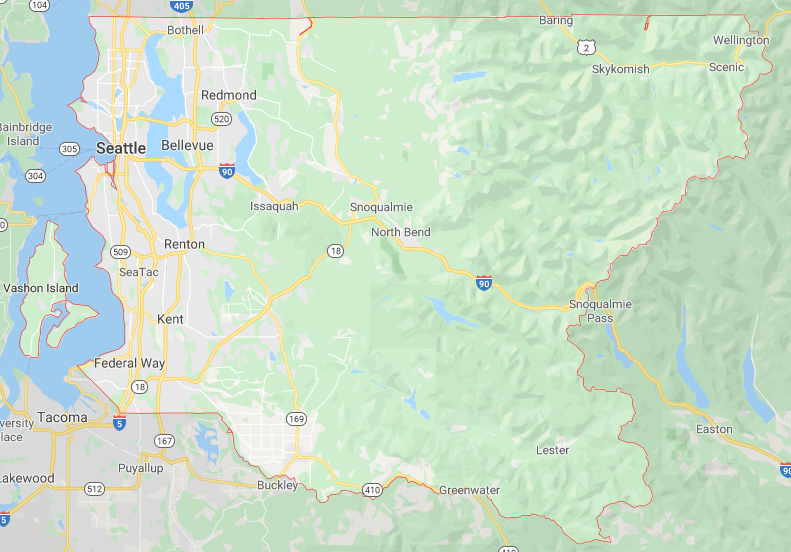

In [1]:
from IPython.display import Image
Image(filename='Images/KC.png')

The images are very similar!

# Results evaluation

Our heatmap greatly resembles the actual map of the place! King County can roughly be aproximated by a rectangle, with the metropolitan region of Seattle exactly described by the heatmap.

Notice that the white stripes described earlier really were not noise but a lake! Also, the small concentration on the southwest region was an island after all, and a very popular island indeed. Our guess of the metropolitan regions being cut off by the northen part was also on the spot.

Also, don’t forget that all these guesses were possible using only a small dataset about the house sales from a very specific time period, imagine what would be possible if we had even more data!